In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Description of the project:
Are there some indications of a bear market in the finance market before it appears?
If we knew that, we could be cautious with our money and save some losses. 
In order to examine that, I would like to check the parameters below:
1. First, I would like to identify the periods of a bear market vs to the periods right before the bear market  
2. Then, I would like to examine the changes of the p/e ratio right before a bear market occurs.
3. Next, I would like to examine the changes of the US treasury yield of 2 years and 10 years,
   and see if anomaly occurs right before bear market appears. 
   Anomaly would be that the yield of 2 years bond is higher than 10 years bond.
4. Finally I would like to run a regression between the S&P500 price and the quarterly earning change rate of the S%P500 
   (top 500 companies) and see if there is a correlation between the two parameters.
   If there is, it might help to see a head a bear market coming...  

# The Data:
The S&P500 index price
The S&P500 p/e ratio
US treasury bonds yield for 2 years and for 10 years
The S&P500 earnings growth.
The period: through January 1990 to today - August 2019. Monthly. Except earning which is reported every quarter.  
links to the Data:
S&P 500 Price: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC
S&P 500 P/E: https://www.quandl.com/data/MULTPL/SP500_PE_RATIO_MONTH-S-P-500-PE-Ratio-by-Month
Us Treasury Yields:  https://www.quandl.com/data/USTREASURY/YIELD-Treasury-Yield-Curve-Rates
S&P 500 earnings growth by quarter: https://www.quandl.com/data/MULTPL/SP500_EARNINGS_GROWTH_QUARTER-S-P-500-Earnings-Growth-Rate-by-Quarter 

In [2]:
# Open A data frame US Treasury yield. Monthly since January 1990. Source: Quandle
us_treasury_file = r'C:\Users\elcha\PycharmProjects\DA_final_project\USTREASURY-YIELD.csv'

us_treasury = pd.read_csv(us_treasury_file,
                          index_col='Date',
                          parse_dates=True, 
                          usecols=['Date','2 YR','10 YR'])

In [3]:
# The Summary Data Tables and Summary Statistics:

In [4]:
print ("US Treasury yields for 2Y & 10Y since January 1990 \n")
us_treasury.head()

US Treasury yields for 2Y & 10Y since January 1990 



,2 YR,10 YR
Date,,
2019-09-30,1.53,1.55
2019-08-31,1.50,1.50
2019-07-31,1.89,2.02
2019-06-30,1.75,2.00
2019-05-31,1.95,2.14


In [5]:
us_treasury.describe()

,2 YR,10 YR
count,357.000000,357.000000
mean,3.341513,4.510924
std,2.334332,1.928298
min,0.200000,1.460000
25%,1.000000,2.730000
50%,3.080000,4.460000
75%,5.440000,6.030000
max,8.960000,9.040000


In [6]:
# Open A data frame of S&P 500 Price. Monthly since January 1990. Source: Yahoo Finance
SnP500_file = r'C:\Users\elcha\PycharmProjects\DA_final_project\^GSPC.csv'

price = pd.read_csv(SnP500_file,
                    index_col='Date',
                    parse_dates=True, 
                    usecols=['Adj Close', 'Date'])

In [7]:
# Open A data frame of S&P 500 P/E. Monthly since January 1990
SnP500_pe_file = r'C:\Users\elcha\PycharmProjects\DA_final_project\MULTPL-SP500_PE_RATIO_MONTH.csv'

pe = pd.read_csv(SnP500_pe_file, 
                 index_col='Date',
                 parse_dates=True,
                 usecols=['Value', 'Date'])

pe = pe.rename({'Value': 'P/E'} , axis=1)  

In [8]:
# Join data frame of S&P 500 Price with the data frame of S&P 500 P/E , by their index - Date.
SnP500 = price.join(pe).dropna(axis=0)

In [9]:
# The Summary Data Tables and Summary Statistics:

In [10]:
print ("S&P 500 Price & P/E since January 1990 \n")
SnP500.head()

S&P 500 Price & P/E since January 1990 



,Adj Close,P/E
Date,,
1990-01-01,329.079987,15.13
1990-02-01,331.890015,14.97
1990-03-01,339.940002,15.62
1990-04-01,330.799988,15.70
1990-05-01,361.230011,16.37


In [11]:
SnP500.describe()

,Adj Close,P/E
count,356.000000,356.000000
mean,1249.952218,24.285028
std,650.474931,14.218966
min,304.000000,13.500000
25%,800.472519,17.917500
50%,1184.974976,21.455000
75%,1470.434998,25.212500
max,2980.379883,123.730000


In [12]:
# # Open A data frame of S&P 500 earning. Quarterly since December 1989. Source: Quandle
SnP500_earn_file = r'C:\Users\elcha\PycharmProjects\DA_final_project\MULTPL-SP500_EARNINGS_GROWTH_QUARTER.csv'

SnP500_earn = pd.read_csv(SnP500_earn_file,
                          index_col='Date',
                          parse_dates=True,
                          usecols=['Value', 'Date'])

In [13]:
SnP500_earn = SnP500_earn.rename({'Value': 'Earning Growth Rate'} , axis=1) 

SnP500_earn = SnP500_earn.sort_values('Date') # Sorting so we would be able later on joining it to the main S&P500 dataframe by quarter

SnP500_Q = pd.merge_asof(SnP500_earn[['Earning Growth Rate']],SnP500[['Adj Close']],
                         on='Date',direction='nearest').set_index('Date')

In [14]:
# The Summary Data Tables and Summary Statistics:

In [15]:
print ("The S&P 500 earning quarterly growth since December 1989 \n")
SnP500_Q.head()

The S&P 500 earning quarterly growth since December 1989 



,Earning Growth Rate,Adj Close
Date,,
1989-12-31,-3.71,329.079987
1990-03-31,-13.18,330.799988
1990-06-30,-15.70,356.149994
1990-09-30,-8.23,304.000000
1990-12-31,-6.69,343.929993


In [16]:
SnP500_Q.describe()

,Earning Growth Rate,Adj Close
count,118.000000,118.000000
mean,24.460424,1236.104837
std,115.144152,638.851442
min,-88.640000,304.000000
25%,-4.770000,807.475021
50%,12.535000,1184.974976
75%,20.175000,1448.882538
max,793.480000,2945.830078


In [17]:
# Identify the periods of a bear market vs to the periods right before the bear market

In [18]:
SnP500['Change']= SnP500['Adj Close'].pct_change() # calculate the percentage change of the price

SnP500['Max 12'] = SnP500['Adj Close'].rolling(window=12).max() # To get the max price the last 12 months

SnP500['Max 12'].fillna(method='bfill', inplace=True) # filling values back

SnP500['Change from max']= SnP500['Adj Close']/SnP500['Max 12']-1 # calculating the price change vs the maximum price in the last 12 months

In [19]:
SnP500[['Adj Close','Change','Max 12', 'Change from max']].head()

,Adj Close,Change,Max 12,Change from max
Date,,,,
1990-01-01,329.079987,NaN,361.230011,-0.089002
1990-02-01,331.890015,0.008539,361.230011,-0.081222
1990-03-01,339.940002,0.024255,361.230011,-0.058938
1990-04-01,330.799988,-0.026887,361.230011,-0.084240
1990-05-01,361.230011,0.091989,361.230011,0.000000


In [20]:
# Defining a bear market period as a drop over 20% from max price
SnP500['Bear'] = np.where(SnP500['Change from max']<-0.2, 'True', 'False')

SnP500[['Bear Price', 'Bear PE']] = SnP500[['Adj Close','P/E']][SnP500['Bear']=='True']

In [21]:
SnP500[['Adj Close','Change','Max 12', 'Change from max', 'Bear','Bear Price']].head()

,Adj Close,Change,Max 12,Change from max,Bear,Bear Price
Date,,,,,,
1990-01-01,329.079987,NaN,361.230011,-0.089002,False,NaN
1990-02-01,331.890015,0.008539,361.230011,-0.081222,False,NaN
1990-03-01,339.940002,0.024255,361.230011,-0.058938,False,NaN
1990-04-01,330.799988,-0.026887,361.230011,-0.084240,False,NaN
1990-05-01,361.230011,0.091989,361.230011,0.000000,False,NaN


In [22]:
SnP500.head()

,Adj Close,P/E,Change,Max 12,Change from max,Bear,Bear Price,Bear PE
Date,,,,,,,,
1990-01-01,329.079987,15.13,NaN,361.230011,-0.089002,False,NaN,NaN
1990-02-01,331.890015,14.97,0.008539,361.230011,-0.081222,False,NaN,NaN
1990-03-01,339.940002,15.62,0.024255,361.230011,-0.058938,False,NaN,NaN
1990-04-01,330.799988,15.70,-0.026887,361.230011,-0.084240,False,NaN,NaN
1990-05-01,361.230011,16.37,0.091989,361.230011,0.000000,False,NaN,NaN


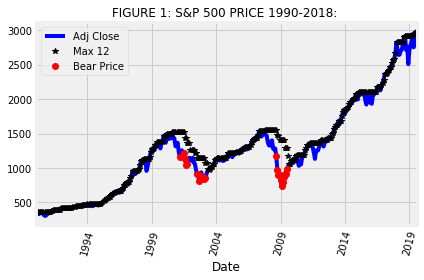

In [23]:
# Plotting the three lines of: 1) s&p 500 price. 2) bear price. 3) Maximum price for 12 months
SnP500[['Adj Close','Max 12','Bear Price']].plot(style=['b','k*','ro'])
plt.xticks(rotation=75)
plt.title('FIGURE 1: S&P 500 PRICE 1990-2018: ',fontsize=12)
plt.tight_layout()
plt.savefig('S&P 500 PRICE 1990-2018.png', fmt='png', dpi=200)
plt.show()

In [24]:
# Checking the p/e ratio movement to see later on if there's a development of a bubble before bear market occurs
SnP500['PE Deviation'] = np.where(SnP500['P/E']> SnP500['P/E'].quantile(0.8), 'True', 'False') # Trying the Pareto rule

SnP500[['PE Deviation Value']] = SnP500[['P/E']][SnP500['PE Deviation']=='True']

In [25]:
print ('S&P 500 All DATA  \n')
SnP500.head()

S&P 500 All DATA  



,Adj Close,P/E,Change,Max 12,Change from max,Bear,Bear Price,Bear PE,PE Deviation,PE Deviation Value
Date,,,,,,,,,,
1990-01-01,329.079987,15.13,NaN,361.230011,-0.089002,False,NaN,NaN,False,NaN
1990-02-01,331.890015,14.97,0.008539,361.230011,-0.081222,False,NaN,NaN,False,NaN
1990-03-01,339.940002,15.62,0.024255,361.230011,-0.058938,False,NaN,NaN,False,NaN
1990-04-01,330.799988,15.70,-0.026887,361.230011,-0.084240,False,NaN,NaN,False,NaN
1990-05-01,361.230011,16.37,0.091989,361.230011,0.000000,False,NaN,NaN,False,NaN


In [26]:
# Slicing the s&p 500 data to a data frame of the bear periods,
# just to get an idea of the bear periods at the last 3 decades (almost 3...)
bear = SnP500[SnP500['Bear']=='True']

In [27]:
print ("Bear periods  \n")
bear

Bear periods  



,Adj Close,P/E,Change,Max 12,Change from max,Bear,Bear Price,Bear PE,PE Deviation,PE Deviation Value
Date,,,,,,,,,,
2001-03-01,1160.329956,26.10,-0.064205,1517.680054,-0.235458,True,1160.329956,26.10,False,NaN
2001-07-01,1211.229980,35.46,-0.010740,1517.680054,-0.201920,True,1211.229980,35.46,True,35.46
2001-08-01,1133.579956,37.85,-0.064108,1436.510010,-0.210879,True,1133.579956,37.85,True,37.85
2001-09-01,1040.939941,36.90,-0.081723,1429.400024,-0.271764,True,1040.939941,36.90,True,36.90
2001-10-01,1059.780029,39.72,0.018099,1366.010010,-0.224178,True,1059.780029,39.72,True,39.72
2002-07-01,911.619995,32.46,-0.079004,1148.079956,-0.205961,True,911.619995,32.46,True,32.46
2002-08-01,916.070007,31.53,0.004881,1148.079956,-0.202085,True,916.070007,31.53,True,31.53
2002-09-01,815.280029,28.89,-0.110024,1148.079956,-0.289875,True,815.280029,28.89,True,28.89
2002-10-01,885.760010,29.24,0.086449,1148.079956,-0.228486,True,885.760010,29.24,True,29.24


In [28]:
 # We can see two periods of a bear market in the last 3 decades (3/2001 & 9/2008)

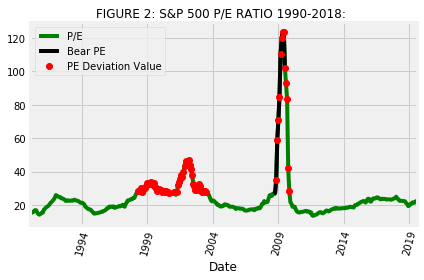

In [29]:
# Checking if the p/e ratio before bear market occurs indicates of a bubble (high p/e ratio)
# Three lines of: 1) s&p 500 p/e. 2) Bear p/e. 3) Deviation of the p/e
SnP500[['P/E','Bear PE','PE Deviation Value']].plot(style=['g','k','ro'])
plt.xticks(rotation=75)
plt.title('FIGURE 2: S&P 500 P/E RATIO 1990-2018: ',fontsize=12)
plt.tight_layout()
plt.savefig('S&P 500 PE RATIO 1990-2018.png', fmt='png', dpi=200)
plt.show()

#  It seems that before the first bear period of 2001-2003 there was a deviation of the p/e ratio.
The p/e was higher than the common p/e of 80% of the time before, which signal a bubble.
But the this deviation didn't occur before the second bear market of 2008-2009. Which means that there wasn't a bubble
At least not in the s&p 500 stocks, maybe at only one sector as we know - US housing market, that influenced the finance markets

In [30]:
# Checking for anomaly in treasury yield (whenever 2yr yield is higher than 10yr yield)
us_treasury['2YR > 10YR Yield'] = np.where(us_treasury['2 YR'] > us_treasury['10 YR'], us_treasury['2 YR'], np.nan)

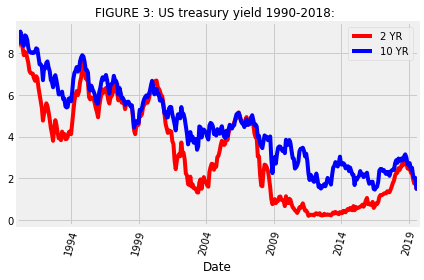

In [31]:
# Plotting two lines: 1) US treasury yield for 2 years. 2) US treasury yield for 10 years
us_treasury[['2 YR','10 YR']].plot(style=['r','b'])
plt.xticks(rotation=75)
plt.title('FIGURE 3: US treasury yield 1990-2018: ',fontsize=12)
plt.tight_layout()
plt.savefig('US treasury yield  1990-2018.png', fmt='png', dpi=200)
plt.show()

In [32]:
# Creating a column of the max yiels each date between 2Y & 10Y
us_treasury['2-10y Max Yield'] = us_treasury[['2 YR','10 YR']].max(axis=1) 

In [33]:
print ("US Treasury yields for 2Y & 10Y . Checking anomaly in the market \n")
us_treasury.head()

US Treasury yields for 2Y & 10Y . Checking anomaly in the market 



,2 YR,10 YR,2YR > 10YR Yield,2-10y Max Yield
Date,,,,
2019-09-30,1.53,1.55,NaN,1.55
2019-08-31,1.50,1.50,NaN,1.50
2019-07-31,1.89,2.02,NaN,2.02
2019-06-30,1.75,2.00,NaN,2.00
2019-05-31,1.95,2.14,NaN,2.14


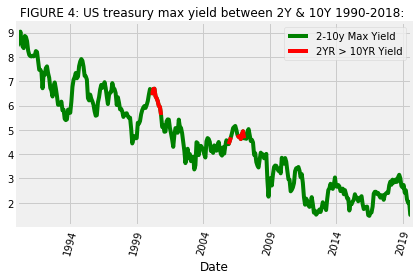

In [34]:
# Plotting two lines: 1) US treasury max yield between 2Y & 10 Y . 2) US treasury when 2 years yield is higher than 10 years
us_treasury[['2-10y Max Yield','2YR > 10YR Yield']].plot(style=['g','r'])
plt.xticks(rotation=75)
plt.title('FIGURE 4: US treasury max yield between 2Y & 10Y 1990-2018: ',fontsize=12)
plt.tight_layout()
plt.savefig('US treasury max yield  1990-2018.png', fmt='png', dpi=200)
plt.show()

In [35]:
# Merging SnP500 Value to the 2Y & 10Y treasury yield dataframe to plot this lines
# and check their values right before a bear market
market = pd.merge_asof(SnP500[['Adj Close']],us_treasury[['2-10y Max Yield','2YR > 10YR Yield']].sort_values('Date')
                       ,on='Date',
                       direction='nearest').set_index('Date')

market['Bear Price'] = bear['Adj Close']

In [36]:
print ("US Market Finance 1990-2018 \n")
market.head()

US Market Finance 1990-2018 



,Adj Close,2-10y Max Yield,2YR > 10YR Yield,Bear Price
Date,,,,
1990-01-01,329.079987,8.43,NaN,NaN
1990-02-01,331.890015,8.43,NaN,NaN
1990-03-01,339.940002,8.51,NaN,NaN
1990-04-01,330.799988,8.65,NaN,NaN
1990-05-01,361.230011,9.04,NaN,NaN


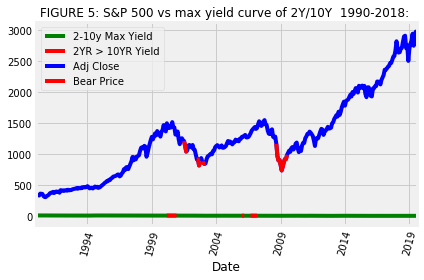

In [37]:
# Plotting four lines:
# 1) US treasury yield 2Y & 10 Y . Two lines combining to one. Marking in red when 2y yield is higher than 10y yield. Anomaly...
# 2) SnP500 price and price in a bear market . Two lines combining to one. Marking in red when it is a bear market price
market[['2-10y Max Yield','2YR > 10YR Yield','Adj Close','Bear Price']].plot(style=['g','r','b','r'])
plt.xticks(rotation=75)
plt.title('FIGURE 5: S&P 500 vs max yield curve of 2Y/10Y  1990-2018: ',fontsize=12)
plt.tight_layout()
plt.savefig('S&P 500 vs max yield curve of 2Y-10Y  1990-2018.png', fmt='png', dpi=200)
plt.show()

# It seems that before the first bear period of 2001-2003 there was a period where the 2y treasury yield was
higher than the 10y yield (3/2000-12/2000). But it was 7 months before the start of the bear market (7/2001)
The yield curve reversed back 7 months before the bear market.
Through January to March 2006 the yield of 2y yield was higher than 10y. Then itאturned over (March to September 2006)
And then again (September 2006 to March 2007) it fliiped over again (2y yield was higher than 10y yield).
The second bear market started at september 2008,
which means that it started one year after the treasury yield curve flipped over to normal (where 10y yield is higher than 2y yield)
That is, the bond yield curve reversal is indicative of a bear market, but it is ahead of it by about a 7 months to year

In [38]:
# Running a regression between the S$P500 price and the quarterly earning change rate of the S&P500 (top 500 companies)
# and see if there is a correlation between the two parameters.
# If there is, it might help to see a head a bear market coming..

In [39]:
print ('Coorelation between Earning growth rate of the S&P 500 and its price  \n')
SnP500_Q.corr()

Coorelation between Earning growth rate of the S&P 500 and its price  



,Earning Growth Rate,Adj Close
Earning Growth Rate,1.000000,0.000431
Adj Close,0.000431,1.000000


In [40]:
# There's seems to be no correlation...

In [41]:
# And yet , running a regression model... With statsmodels using Ordinary Least Squares regression
x = SnP500_Q['Earning Growth Rate']  # response
y = SnP500_Q['Adj Close']  # predictor
x = sm.add_constant(x)  # Adds a constant term to the predictor
result=sm.OLS(y, x).fit() #Fit the model and print output

C:\Users\elcha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                 2.152e-05
Date:                Sat, 02 Nov 2019   Prob (F-statistic):              0.996
Time:                        00:05:37   Log-Likelihood:                -929.17
No. Observations:                 118   AIC:                             1862.
Df Residuals:                     116   BIC:                             1868.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1236.0464     60.393     20.467      0.000    1116.430    1355.663
Earning Growth Rate     0.0024      0.515      0.005      0.996      -1.018       1.023
==============================================================================
Omnibus:                        9.205   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.570
Skew:                           0.697   Prob(JB):                      0.00835
Kurtosis:                       3.072   Cond. No.                         120.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Plotting a scatter plot of Adj Close vs. Earning Growth Rate add the best fit line and show its formula and R-squered¶

In [44]:
SnP500_q = SnP500_Q.copy()
Y=SnP500_q["Adj Close"]
X=SnP500_q["Earning Growth Rate"]
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

line = slope*X+intercept # Find the line plot
SnP500_q['Y'] = line # adding a column called Y to the dataframe

In [45]:
SnP500_q.head()

,Earning Growth Rate,Adj Close,Y
Date,,,
1989-12-31,-3.71,329.079987,1236.037522
1990-03-31,-13.18,330.799988,1236.014893
1990-06-30,-15.70,356.149994,1236.008872
1990-09-30,-8.23,304.000000,1236.026721
1990-12-31,-6.69,343.929993,1236.030401


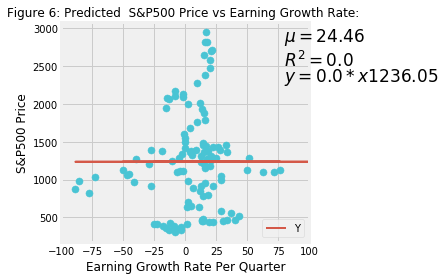

In [46]:
# Add a figure and set axis (e.i. fig, ax=plt.subplots())
fig, ax = plt.subplots()
# Creating scatter plot and line
SnP500_q.plot.scatter(x='Earning Growth Rate', y='Adj Close', color='#49c4d4', ax=ax, s=50)
SnP500_q.plot('Earning Growth Rate', "Y", color='#d45949', linewidth=2, ax=ax)

# Setting axis x lim
plt.xlim(-100,100)

# Adding a text using these coordinates:
# x = 80
# y (for R-suared and mu) = 2500
# y (for the line formula) = 2300

r_squared = np.round(r_value**2, decimals=2)
mu = np.round(SnP500_q["Earning Growth Rate"].mean(), decimals=2)

plt.text(80, 2500, '$\mu={0}$ \n$R^2={1}$'.format(mu, r_squared), fontsize=17)
plt.text(80, 2300, '$y={0}*x{1}$'.format(np.round(slope, decimals=2),np.round(intercept, decimals=2)), fontsize=17)
plt.legend(loc='lower right')

plt.xlabel('Earning Growth Rate Per Quarter',fontsize=12)
plt.ylabel('S&P500 Price',fontsize=12)
plt.title('Figure 6: Predicted  S&P500 Price vs Earning Growth Rate: ',fontsize=12)
fig.tight_layout()
plt.savefig('S&P500 Price vs. Earning Growth Rate.png', fmt='png', dpi=100)
# As We saw before, there is no correlation between the quarterly earning growth of the companies of the S&P500 Index
# to the S&P500 price (Adj Close price)
plt.show()